In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from datasets import load_dataset


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df_us = df[df['job_country'] == 'United States'].copy()

In [5]:
df_us['job_posted_month']= df_us['job_posted_date'].dt.strftime('%B')

In [7]:
df_us_pivot = df_us.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')

In [10]:
df_us_pivot.reset_index(inplace = True)

In [12]:
df_us_pivot['month_number'] = pd.to_datetime(df_us_pivot['job_posted_month'], format = '%B').dt.month

In [13]:
df_us_pivot.sort_values('month_number', inplace = True)

In [14]:
df_us_pivot.set_index('job_posted_month', inplace = True)

<Axes: xlabel='job_posted_month'>

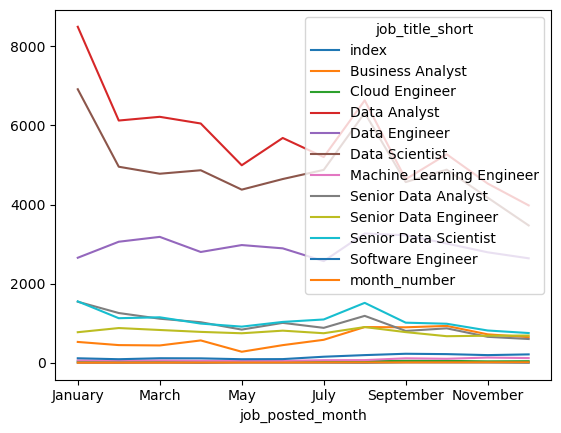

In [15]:
df_us_pivot.plot(kind = 'line')

In [ ]:
top_3 = df_us['job_title_short'].value_counts().nlargest(3).index

In [17]:
top_3.to_list()

['Data Analyst', 'Data Scientist', 'Data Engineer']

<Axes: xlabel='job_posted_month'>

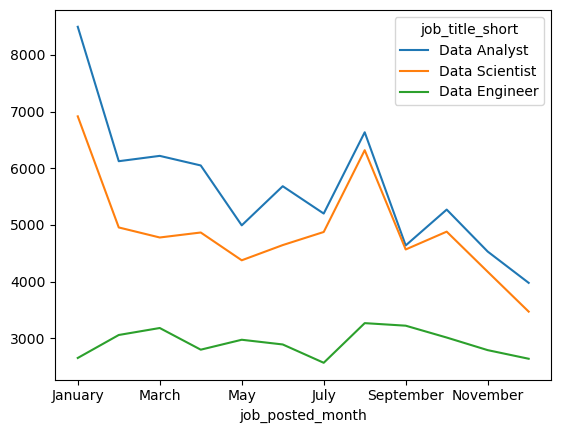

In [18]:
df_us_pivot[top_3].plot(kind = 'line')